In [3]:
import cv2
import matplotlib.pyplot as plt

# Загрузка изображения
image = cv2.imread('cat.jpg')

# Конвертация из BGR (формат OpenCV) в RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [8]:
image_rgb

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

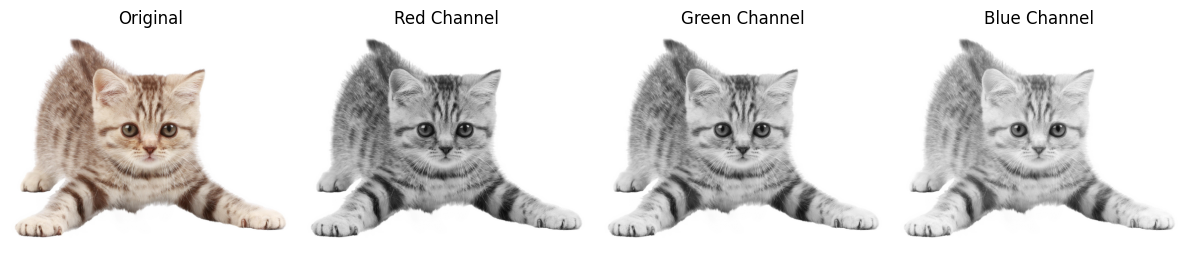

In [4]:
# Разделение каналов (альтернативный вариант)
b, g, r = cv2.split(image_rgb)

# Отображение в серых тонах
plt.figure(figsize=(12, 4))

plt.subplot(141)
plt.imshow(image_rgb)
plt.title('Original')
plt.axis('off')

plt.subplot(142)
plt.imshow(r, cmap='gray')
plt.title('Red Channel')
plt.axis('off')

plt.subplot(143)
plt.imshow(g, cmap='gray')
plt.title('Green Channel')
plt.axis('off')

plt.subplot(144)
plt.imshow(b, cmap='gray')
plt.title('Blue Channel')
plt.axis('off')

plt.tight_layout()
plt.show()

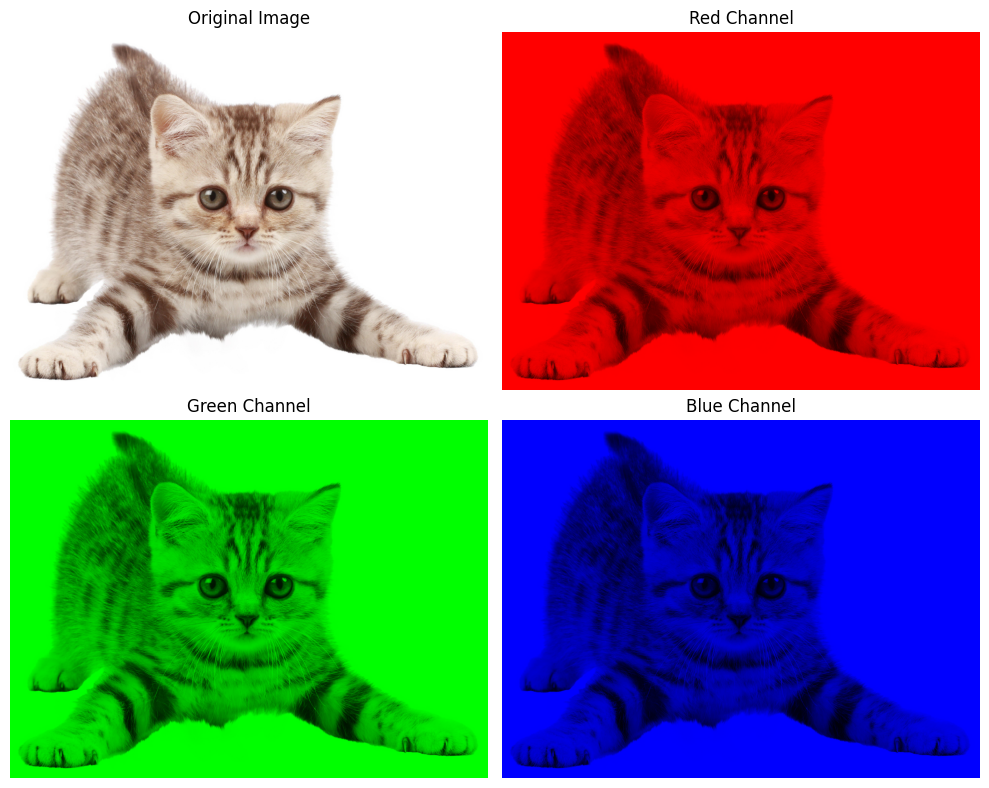

In [7]:
# Разделение на каналы
red_channel = image_rgb.copy()
red_channel[:, :, (1, 2)] = 0  # Обнуляем зеленый и синий каналы

green_channel = image_rgb.copy()
green_channel[:, :, (0, 2)] = 0  # Обнуляем красный и синий каналы

blue_channel = image_rgb.copy()
blue_channel[:, :, (0, 1)] = 0  # Обнуляем красный и зеленый каналы

# Настройка отображения в matplotlib
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Исходное изображение
axes[0, 0].imshow(image_rgb)
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Красный канал
axes[0, 1].imshow(red_channel)
axes[0, 1].set_title('Red Channel')
axes[0, 1].axis('off')

# Зеленый канал
axes[1, 0].imshow(green_channel)
axes[1, 0].set_title('Green Channel')
axes[1, 0].axis('off')

# Синий канал
axes[1, 1].imshow(blue_channel)
axes[1, 1].set_title('Blue Channel')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

In [10]:
import torch

In [24]:
img = torch.tensor(image, dtype=torch.float32)
img = torch.permute(img, (2, 0, 1)).unsqueeze(0)
img.shape

torch.Size([1, 3, 2248, 3000])

In [14]:
img.unsqueeze(0).shape

torch.Size([1, 2248, 3000, 3])

In [ ]:
from torch.nn import Conv2d

conv2d_layer = Conv2d(
    in_channels=3,
    out_channels=8,
    kernel_size=25,
    stride=1,
    padding=1,
)

# input shape -- torch.Size([1, 3, 2248, 3000])
conv2d_layer(img).shape # torch.Size([1, 8, 2226, 2978])



torch.Size([1, 8, 2226, 2978])

In [ ]:
out = conv2d_layer(img)
out_demo = torch.permute(out, (0, 2, 3, 1)).squeeze(0)
out_demo.shape

torch.Size([2226, 2978, 8])

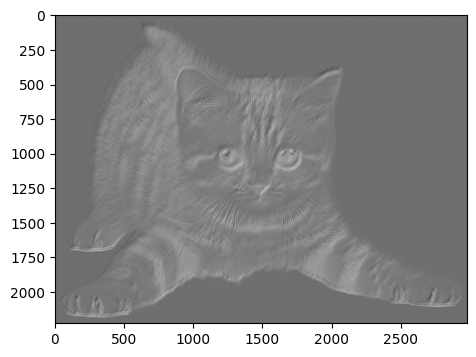

In [ ]:
plt.figure(figsize=(12, 4))
plt.imshow(out_demo[..., 7].detach().numpy(), cmap='gray')
plt.show()

In [60]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import albumentations as A
from albumentations.pytorch import ToTensorV2

# Загрузка изображения
image_path = 'cat.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Конвертируем BGR в RGB

# Определяем аугментации
transformations = [
    ('Original', A.NoOp()),
    ('Horizontal Flip', A.HorizontalFlip(p=1.0)),
    ('Vertical Flip', A.VerticalFlip(p=1.0)),
    ('Rotation (45°)', A.Rotate(limit=45, p=1.0)),
    ('Brightness Contrast', A.RandomBrightnessContrast(p=1.0)),
    ('Blur', A.Blur(blur_limit=5, p=1.0)),
    ('Gaussian Noise', A.GaussNoise(var_limit=(10.0, 50.0), p=1.0)),
    ('Cutout', A.CoarseDropout(max_holes=8, max_height=20, max_width=20, p=1.0)),
    ('RGB Shift', A.RGBShift(r_shift_limit=20, g_shift_limit=20, b_shift_limit=20, p=1.0)),
    ('Random Crop', A.RandomCrop(height=200, width=200, p=1.0)),
    ('Hue Saturation', A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=1.0)),
    ('Grayscale', A.ToGray(p=1.0))
]

# Создаем фигуру для отображения
fig, axes = plt.subplots(3, 4, figsize=(15, 12))
axes = axes.ravel()

# Применяем аугментации и отображаем результаты
for i, (name, transform) in enumerate(transformations):
    augmented = transform(image=image)['image']
    
    # Для отображения в matplotlib
    if len(augmented.shape) == 3 and augmented.shape[2] == 3:
        display_img = augmented
    else:
        display_img = cv2.cvtColor(augmented, cv2.COLOR_GRAY2RGB)
    
    axes[i].imshow(display_img)
    axes[i].set_title(name, fontsize=12)
    axes[i].axis('off')

plt.tight_layout()
plt.savefig('augmentations_demo.jpg', dpi=150, bbox_inches='tight')
plt.show()

ModuleNotFoundError: No module named 'albumentations'

In [66]:
# augment_cat.py (переносимая версия под разные Pillow)
import os, random
from datetime import datetime
import numpy as np
from PIL import Image, ImageOps, ImageFilter, ImageEnhance, ImageDraw, ImageFont

random.seed(42)
np.random.seed(42)

# ---- Совместимость с разными версиями Pillow ----
RES = getattr(Image, "Resampling", Image)              # RES.BICUBIC или Image.BICUBIC (старые версии)
TRF = getattr(Image, "Transform", Image)               # TRF.AFFINE/TRF.PERSPECTIVE или Image.AFFINE/PERSPECTIVE
AFFINE = getattr(TRF, "AFFINE", Image.AFFINE)
PERSPECTIVE = getattr(TRF, "PERSPECTIVE", Image.PERSPECTIVE)

def _text_wh(draw, text, font):
    # Pillow ≥9.3/10: textbbox; старые: textsize
    if hasattr(draw, "textbbox"):
        l, t, r, b = draw.textbbox((0, 0), text, font=font)
        return r - l, b - t
    return draw.textsize(text, font=font)

# ---- Утилиты ----
def load_image():
    for p in ["cat.jpg", "./cat.jpg"]:
        if os.path.exists(p):
            return Image.open(p).convert("RGB")
    raise FileNotFoundError("Не найден файл cat.jpg рядом со скриптом.")

def fit_square(im, target=512, pad_color=(245, 245, 245)):
    w, h = im.size
    scale = min(target / w, target / h)
    nw, nh = int(w * scale), int(h * scale)
    im_resized = im.resize((nw, nh), RES.BICUBIC)
    canvas = Image.new("RGB", (target, target), pad_color)
    canvas.paste(im_resized, ((target - nw)//2, (target - nh)//2))
    return canvas

def label_image(im, text, bg_alpha=160):
    im = im.convert("RGBA")
    W, H = im.size
    overlay = Image.new("RGBA", (W, H), (0,0,0,0))
    draw = ImageDraw.Draw(overlay)
    font = ImageFont.load_default()
    tw, th = _text_wh(draw, text, font)
    pad_x, pad_y = 8, 6
    rect_w = min(W, tw + 2*pad_x)
    rect_h = th + 2*pad_y
    draw.rectangle([0, H - rect_h, rect_w, H], fill=(0,0,0,bg_alpha))
    draw.text((pad_x, H - rect_h + pad_y), text, fill=(255,255,255,255), font=font)
    return Image.alpha_composite(im, overlay).convert("RGB")

def safe_name(s: str) -> str:
    return (s.replace(" ", "_").replace("°","deg").replace("+","plus")
             .replace("×","x").replace("%","pct").replace("(","").replace(")","").replace("/","_"))

# ---- Аугментации ----
def aug_flip_h(im): return im.transpose(Image.Transpose.FLIP_LEFT_RIGHT)
def aug_flip_v(im): return im.transpose(Image.Transpose.FLIP_TOP_BOTTOM)
def aug_rotate(im, angle=15): return im.rotate(angle, resample=RES.BICUBIC, expand=True)

def aug_center_crop(im, crop_ratio=0.8):
    w, h = im.size
    cw, ch = int(w * crop_ratio), int(h * crop_ratio)
    left, top = (w - cw)//2, (h - ch)//2
    return im.crop((left, top, left + cw, top + ch)).resize((w, h), RES.BICUBIC)

def aug_scale_pad(im, scale=0.8, pad_color=(255,255,255)):
    w, h = im.size
    nw, nh = int(w * scale), int(h * scale)
    small = im.resize((nw, nh), RES.BICUBIC)
    canvas = Image.new("RGB", (w, h), pad_color)
    canvas.paste(small, ((w - nw)//2, (h - nh)//2))
    return canvas

def aug_shear_x(im, shear=0.3):
    w, h = im.size
    m = (1, shear, 0, 0, 1, 0)
    new_w = int(w + abs(shear) * h)
    new_im = im.transform((new_w, h), AFFINE, m, resample=RES.BICUBIC)
    return new_im.resize((w, h), RES.BICUBIC)

def _perspective_coeffs(src_pts, dst_pts):
    A, B = [], []
    for (x, y), (u, v) in zip(src_pts, dst_pts):
        A.append([x, y, 1, 0, 0, 0, -u*x, -u*y])
        A.append([0, 0, 0, x, y, 1, -v*x, -v*y])
        B.extend([u, v])
    A = np.asarray(A, dtype=np.float64)
    B = np.asarray(B, dtype=np.float64)
    return np.linalg.lstsq(A, B, rcond=None)[0].tolist()

def aug_perspective(im, shift_ratio=0.08):
    w, h = im.size
    dx, dy = int(w*shift_ratio), int(h*shift_ratio)
    src = [(0,0), (w,0), (w,h), (0,h)]
    dst = [(dx,dy), (w-dx,dy), (w+dx,h-dy), (-dx,h-dy)]
    coeffs = _perspective_coeffs(src, dst)
    return im.transform((w, h), PERSPECTIVE, coeffs, resample=RES.BICUBIC)

def aug_brightness(im, f=1.4): return ImageEnhance.Brightness(im).enhance(f)
def aug_contrast(im, f=1.4):   return ImageEnhance.Contrast(im).enhance(f)
def aug_saturation(im, f=1.5): return ImageEnhance.Color(im).enhance(f)

def aug_hue_shift(im, degrees=20):
    hsv = im.convert("HSV")
    arr = np.array(hsv, dtype=np.uint8)
    h = arr[:, :, 0].astype(np.int16)
    shift = int((degrees % 360) * 255 / 360)
    arr[:, :, 0] = ((h + shift) % 255).astype(np.uint8)
    return Image.fromarray(arr, mode="HSV").convert("RGB")

def aug_blur(im, r=2): return im.filter(ImageFilter.GaussianBlur(radius=r))
def aug_sharpen(im):   return im.filter(ImageFilter.UnsharpMask(radius=2, percent=150, threshold=3))

def aug_noise(im, sigma=12):
    arr = np.array(im).astype(np.int16)
    noise = np.random.normal(0, sigma, arr.shape)
    return Image.fromarray(np.clip(arr + noise, 0, 255).astype(np.uint8), mode="RGB")

def aug_cutout(im, box_ratio=0.4, fill=None):
    w, h = im.size
    bw, bh = int(w*box_ratio), int(h*box_ratio)
    cx = np.clip(random.randint(bw//2, max(bw//2, w - bw//2)) if w > bw else w//2, 0, w)
    cy = np.clip(random.randint(bh//2, max(bh//2, h - bh//2)) if h > bh else h//2, 0, h)
    x0, y0 = max(0, cx - bw//2), max(0, cy - bh//2)
    x1, y1 = min(w, x0 + bw), min(h, y0 + bh)
    if fill is None:
        mean = tuple(np.array(im).reshape(-1,3).mean(axis=0).astype(int).tolist())
        fill = mean
    out = im.copy()
    ImageDraw.Draw(out).rectangle([x0, y0, x1, y1], fill=fill)
    return out

def aug_grayscale(im):       return ImageOps.grayscale(im).convert("RGB")
def aug_solarize(im, thr=128): return ImageOps.solarize(im, threshold=thr)
def aug_posterize(im, bits=3):  return ImageOps.posterize(im, bits=bits)
def aug_equalize(im):           return ImageOps.equalize(im)

# ---- Основная логика ----
if __name__ == "__main__":
    os.makedirs("augmented", exist_ok=True)
    base = fit_square(load_image(), target=512, pad_color=(245, 245, 245))

    showcase = [
        ("Original",         lambda im: im),
        ("Flip H",           aug_flip_h),
        ("Flip V",           aug_flip_v),
        ("Rotate +15°",      lambda im: aug_rotate(im, +15)),
        ("Rotate -15°",      lambda im: aug_rotate(im, -15)),
        ("Center Crop 80%",  lambda im: aug_center_crop(im, 0.80)),
        ("Scale+Pad 80%",    lambda im: aug_scale_pad(im, 0.80)),
        ("Shear X +0.3",     lambda im: aug_shear_x(im, 0.3)),
        ("Perspective",      aug_perspective),
        ("Brightness ×1.4",  lambda im: aug_brightness(im, 1.4)),
        ("Contrast ×1.4",    lambda im: aug_contrast(im, 1.4)),
        ("Saturation ×1.5",  lambda im: aug_saturation(im, 1.5)),
        ("Hue +20°",         lambda im: aug_hue_shift(im, 20)),
        ("Gaussian Blur",    aug_blur),
        ("Sharpen",          aug_sharpen),
        ("Gaussian Noise",   aug_noise),
        ("Cutout 40%",       aug_cutout),
        ("Grayscale",        aug_grayscale),
        ("Solarize",         aug_solarize),
        ("Posterize (3b)",   lambda im: aug_posterize(im, 3)),
        ("Equalize",         aug_equalize),
    ]

    GRID_ROWS, GRID_COLS = 4, 5
    showcase = showcase[:GRID_ROWS*GRID_COLS]

    labeled = []
    stamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    for name, fn in showcase:
        try:
            out = fn(base)
        except Exception as e:
            print(f"[WARN] '{name}' failed: {e}")
            out = base.copy()
        tile = label_image(fit_square(out, 512), name)
        tile.save(os.path.join("augmented", f"{stamp}_{safe_name(name)}.png"))
        labeled.append(tile)

    cell = 512
    pad = 12
    sheet_w = GRID_COLS * cell + (GRID_COLS + 1) * pad
    sheet_h = GRID_ROWS * cell + (GRID_ROWS + 1) * pad
    sheet = Image.new("RGB", (sheet_w, sheet_h), (255,255,255))
    for i, img in enumerate(labeled):
        r, c = divmod(i, GRID_COLS)
        x = pad + c * (cell + pad)
        y = pad + r * (cell + pad)
        sheet.paste(img, (x, y))
    sheet.save("aug_grid.png")
    print("Готово: см. ./augmented/*.png и ./aug_grid.png")


C:\Users\Максим\AppData\Local\Temp\ipykernel_10332\1117063083.py:111: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  return Image.fromarray(arr, mode="HSV").convert("RGB")
C:\Users\Максим\AppData\Local\Temp\ipykernel_10332\1117063083.py:119: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  return Image.fromarray(np.clip(arr + noise, 0, 255).astype(np.uint8), mode="RGB")


Готово: см. ./augmented/*.png и ./aug_grid.png
